In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic_clean_data.csv' )  


<Axes: xlabel='Sex', ylabel='count'>

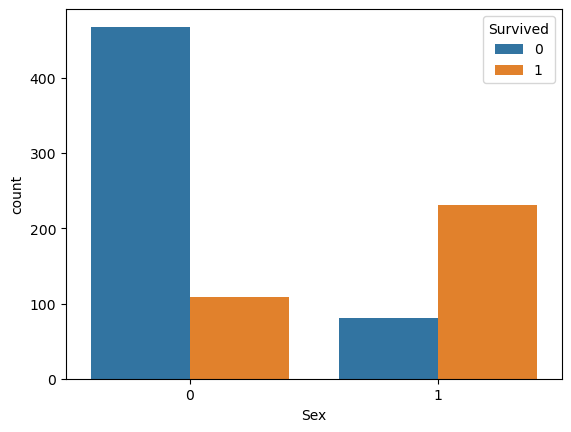

In [2]:
sns.countplot(x='Sex', hue='Survived', data=df)


In [3]:
# in above code 0 stands for men and 1 stands for women, their survival is confirmed by 0:not survived,1:survived
# we could see that the survival of women is more comparetively to that of men
                                             

SyntaxError: invalid syntax (4247314943.py, line 1)

<Axes: xlabel='Age', ylabel='Count'>

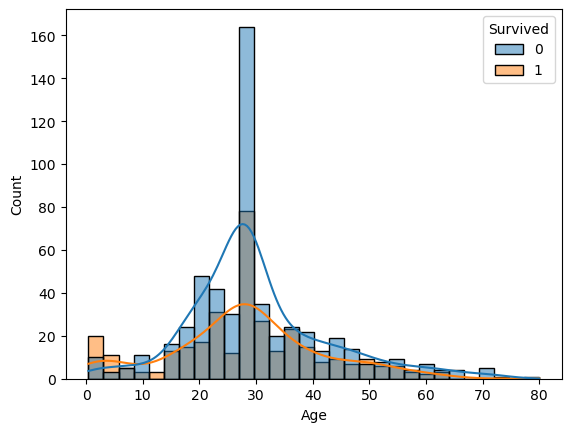

In [5]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True)



In [6]:
#this plot shows the survival based on the ages of the passengers

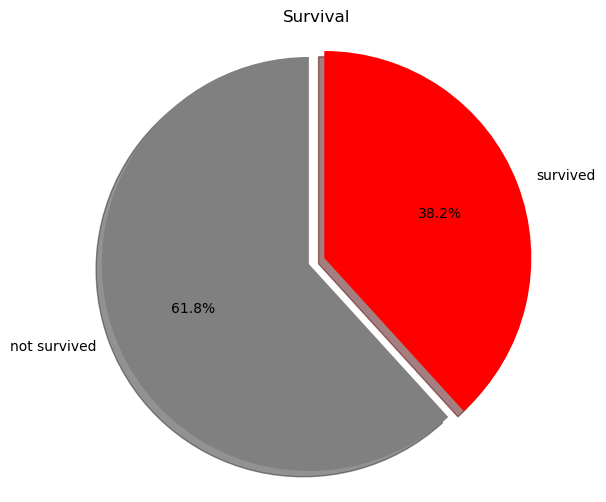

In [8]:
survival_counts = df['Survived'].value_counts()

# Labels and colors
labels = ['not survived','survived']
sizes = survival_counts.values
colors = ['grey', 'red'] 
explode = (0, 0.08)  


# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=explode, shadow=True)

plt.title('Survival')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()

In [9]:
#this shows that 61.8% of the passengers were not able to survive the accident whereas 38.2% were able to survive

C:\Users\priyn\AppData\Local\Temp\ipykernel_15520\3636319669.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=port_survival_rate, palette='Blues')


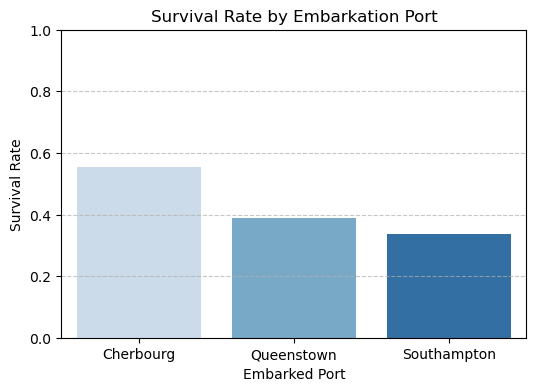

In [10]:

# Calculate survival rate per port
port_survival_rate = df.groupby('Embarked')['Survived'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=port_survival_rate, palette='Blues')

plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.xlabel('Embarked Port')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.show()


In [ ]:
#this shows the survival expectancy of the passengers from different ports 

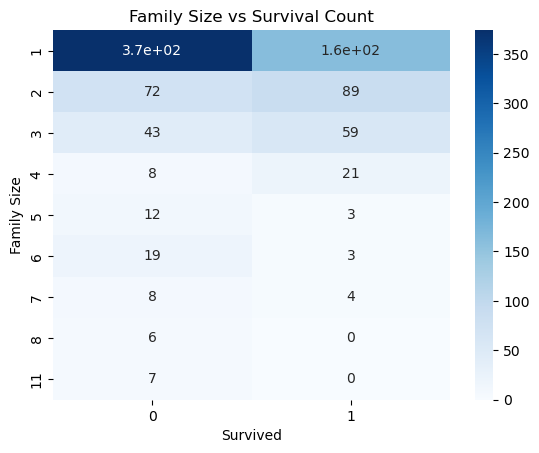

In [11]:
heat_data = pd.crosstab(df['FamilySize'], df['Survived'])

sns.heatmap(heat_data, annot=True, cmap='Blues')
plt.title('Family Size vs Survival Count')
plt.xlabel('Survived')
plt.ylabel('Family Size')
plt.show()

In [13]:
#this heatmap shows the survival rate as per the size of the family, we could easily depict that survival rate was more possible when there at least 2 or more members in the family but more than 4 membered family had also the lowest survival rate
#in the top cell 3.7e+02 and 1.6e+02 are depictions of the number 370 and 160

C:\Users\priyn\AppData\Local\Temp\ipykernel_15520\417312885.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_grouped = df.groupby([fare_bins, 'Survived'])['Fare'].mean().unstack()


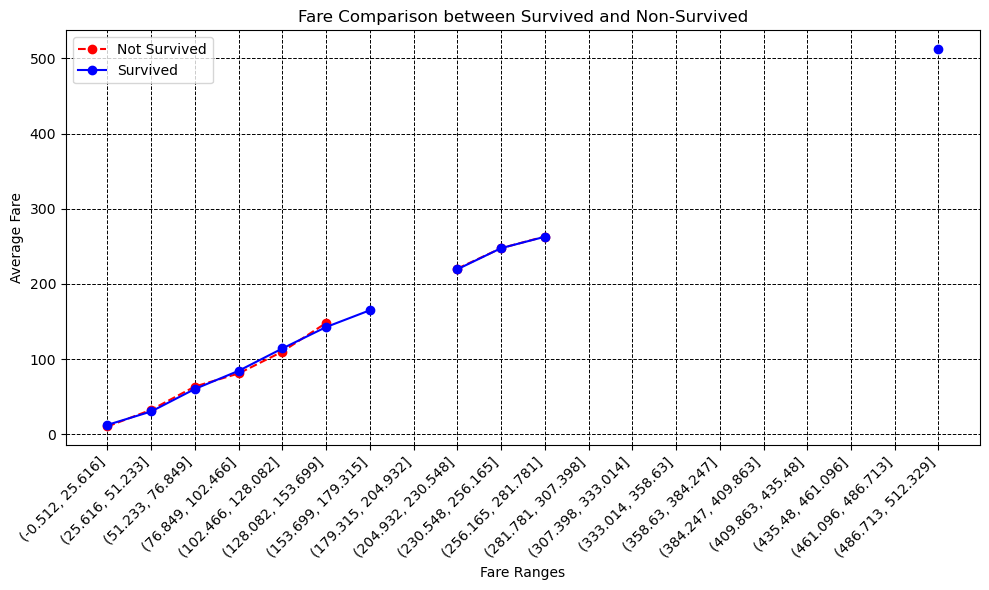

In [14]:
fare_bins = pd.cut(df['Fare'], bins=20)
fare_grouped = df.groupby([fare_bins, 'Survived'])['Fare'].mean().unstack()

# Plotting
plt.figure(figsize=(10,6))

# Dashed line for non-survivors (Survived == 0)
plt.plot(fare_grouped.index.astype(str), fare_grouped[0], linestyle='--', marker='o', label='Not Survived', color='red')

# Solid line for survivors (Survived == 1)
plt.plot(fare_grouped.index.astype(str), fare_grouped[1], linestyle='-', marker='o', label='Survived', color='blue')

# Labels and legend
plt.xticks(rotation=45, ha='right')
plt.xlabel('Fare Ranges')
plt.ylabel('Average Fare')
plt.title('Fare Comparison between Survived and Non-Survived')
plt.legend()
plt.grid(True, color='black', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()
